In [ ]:
import pandas as pd

data = pd.read_csv("train_data.csv")


'''
Find correlation between the distance of stoppage and the delay incurred.
distances=[200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000,3200]
'''

delay_nthstation = {}
count_nthtation = {}

distances=[0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000,3200]
counter={}
late_counter={}

data.rename(columns={'Unnamed: 0':'StationNo'},inplace=True)
data = data[~data["StationNo"].isnull()]

data['arrival_delay'] = pd.to_numeric(data['arrival_delay'], errors='coerce')
data['distance'] = pd.to_numeric(data['distance'], errors='coerce')
data = data.dropna(subset=["distance", "arrival_delay"])

n_row,n_col = data.shape

def findBucket(distance):
  return (distance//200)

for i in range(n_row):
  distance_stoppage = float(data.iloc[i]["distance"])
  bucket = findBucket(distance_stoppage)
  delay=float(data.iloc[i]["arrival_delay"])
  if (distance_stoppage == 0):
    continue
  if bucket not in counter:
    counter[bucket]=1
    late_counter[bucket]=delay
  else:
    counter[bucket]+=1
    late_counter[bucket]+=delay

for key in counter:
  late_counter[key]=late_counter[key]/counter[key]

print(late_counter)

{0.0: 19.0721781311243, 1.0: 27.571280925595648, 2.0: 35.14959430331893, 3.0: 36.87277762229522, 4.0: 48.34717398168614, 5.0: 60.88910632746249, 6.0: 65.94031903190319, 7.0: 70.82679309996973, 8.0: 76.58375536893391, 9.0: 83.99420834900339, 10.0: 77.95816993464052, 12.0: 83.78117299162149, 13.0: 79.33333333333333, 14.0: 126.29480017189515, 15.0: 50.945344129554655, 11.0: 68.44719057733153, 16.0: 150.92888888888888, 17.0: 160.07142857142858, 18.0: 221.8909090909091, 19.0: 170.18367346938774}


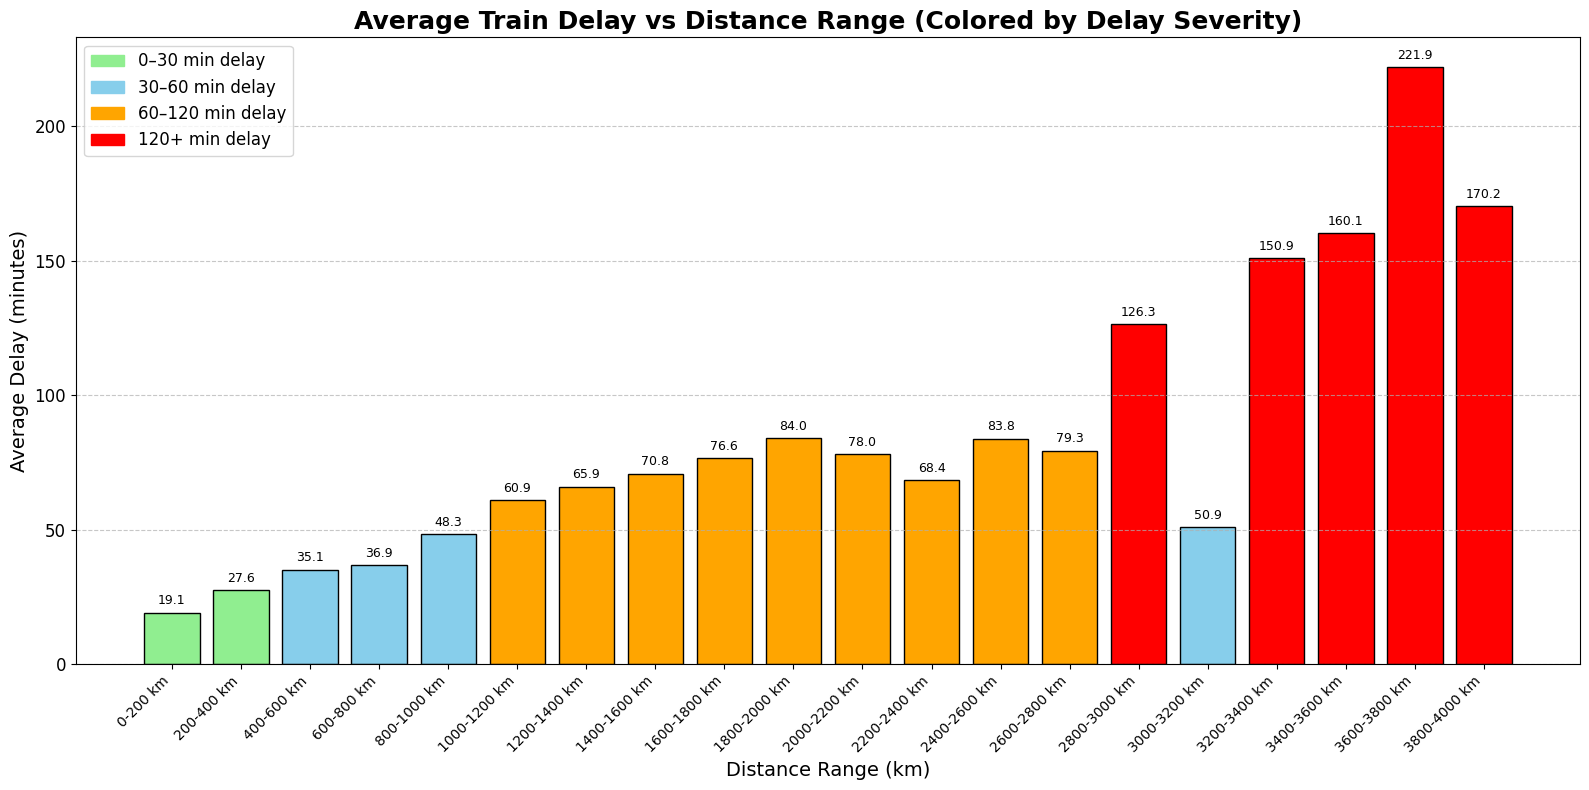

In [ ]:
import matplotlib.pyplot as plt
keys = sorted(late_counter.keys())
values = [late_counter[k] for k in keys]
distance_labels = [f"{int(k*200)}-{int((k+1)*200)} km" for k in keys]

# Define color based on ranges
def get_color(value):
    if value <= 30:
        return 'lightgreen'
    elif value <= 60:
        return 'skyblue'
    elif value <= 120:
        return 'orange'
    else:
        return 'red'

colors = [get_color(v) for v in values]

# Plot
plt.figure(figsize=(16,8))
bars = plt.bar(distance_labels, values, color=colors, edgecolor='black')

# Title and labels
plt.title('Average Train Delay vs Distance Range (Colored by Delay Severity)', fontsize=18, fontweight='bold')
plt.xlabel('Distance Range (km)', fontsize=14)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)

# Create custom legend
legend_patches = [
    mpatches.Patch(color='lightgreen', label='0–30 min delay'),
    mpatches.Patch(color='skyblue', label='30–60 min delay'),
    mpatches.Patch(color='orange', label='60–120 min delay'),
    mpatches.Patch(color='red', label='120+ min delay')
]
plt.legend(handles=legend_patches, loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
'''
Now analyze the correlation between the scheduled_arrival_time and the delay
buckets=["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00"]
minutes=[0,120,240,360,480,600,720,840,960,1080,1200,1320]
'''

counter={}
late_counter={}

data['actual_arrival_time'] = pd.to_numeric(data['actual_arrival_time'], errors='coerce')

def findBucket(time_bucket):
  return (time_bucket//120)


for i in range(n_row):
  scheduled_arrival_time = float(data.iloc[i]["actual_arrival_time"])
  bucket = findBucket(scheduled_arrival_time)
  delay=float(data.iloc[i]["arrival_delay"])
  stationNo = data.iloc[i]["StationNo"]
  if (stationNo == "0"):
    continue
  if bucket not in counter:
    counter[bucket]=1
    late_counter[bucket]=delay
  else:
    counter[bucket]+=1
    late_counter[bucket]+=delay

for key in counter:
  late_counter[key]=late_counter[key]/counter[key]

print(late_counter)

{9.0: 34.16471979621543, 10.0: 31.07495660407133, 11.0: 33.62065364936828, 1.0: 39.794785416708194, 2.0: 34.729282403602774, 3.0: 33.7770493379925, 4.0: 39.0623307839766, 5.0: 41.987152378763504, 0.0: 39.700546745710874, 6.0: 45.36269965374735, 7.0: 43.242154075464406, 8.0: 37.12163439347649}


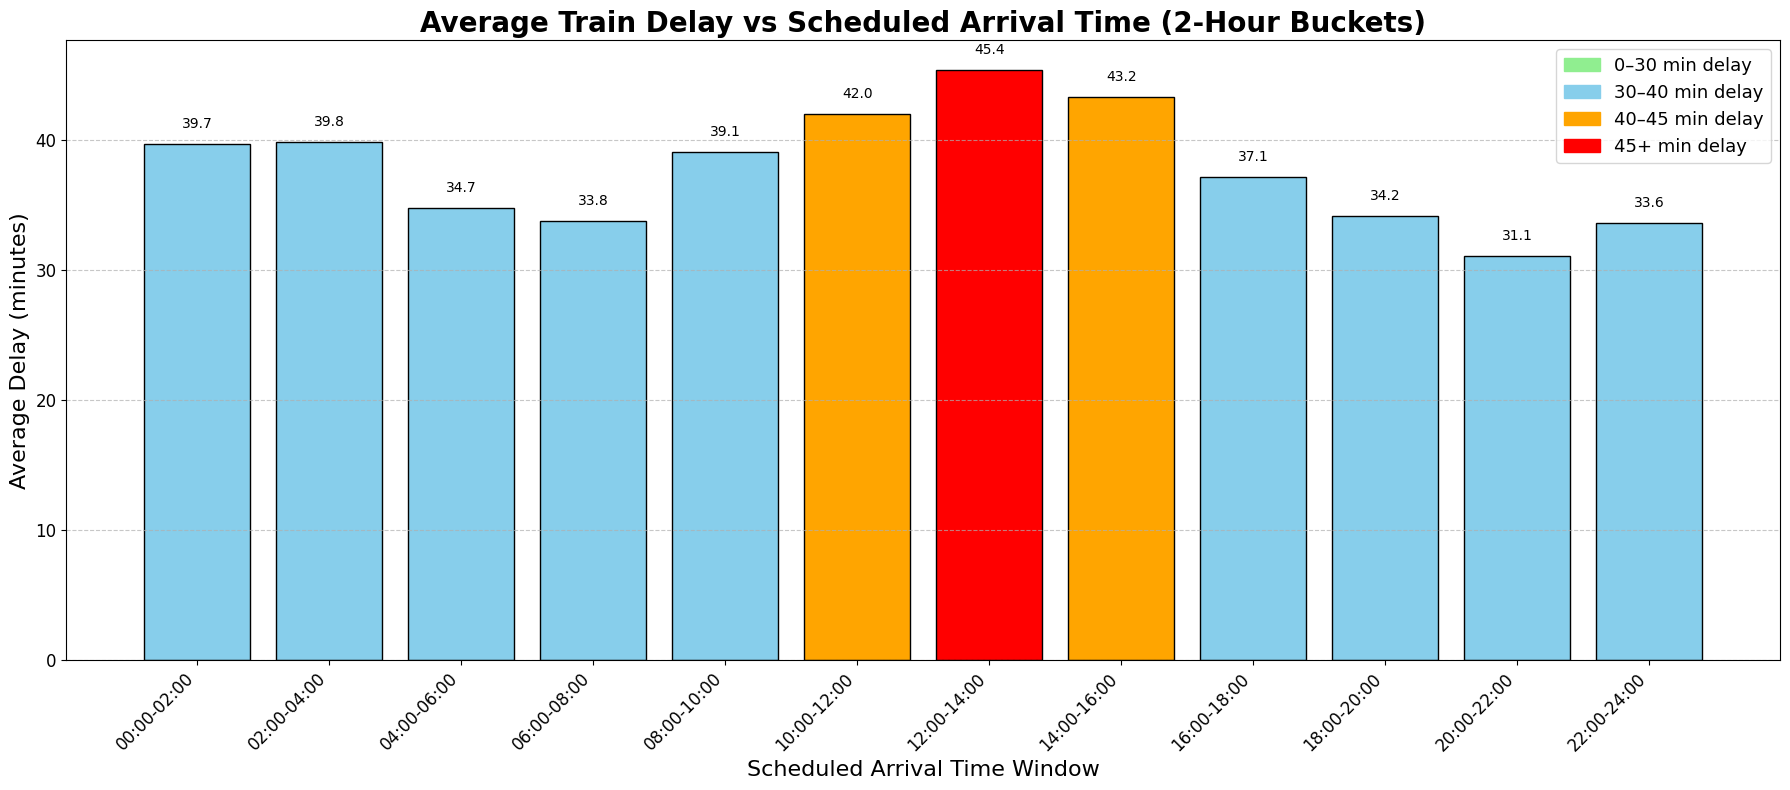

In [ ]:
avg_delay_per_time_bucket = late_counter
time_labels = {
    0: "00:00-02:00",
    1: "02:00-04:00",
    2: "04:00-06:00",
    3: "06:00-08:00",
    4: "08:00-10:00",
    5: "10:00-12:00",
    6: "12:00-14:00",
    7: "14:00-16:00",
    8: "16:00-18:00",
    9: "18:00-20:00",
    10: "20:00-22:00",
    11: "22:00-24:00"
}

# Sort by time
keys_sorted = sorted(avg_delay_per_time_bucket.keys())
delays_sorted = [avg_delay_per_time_bucket[k] for k in keys_sorted]
labels_sorted = [time_labels[int(k)] for k in keys_sorted]

# Coloring logic based on delay
def color_delay(d):
    if d <= 30:
        return 'lightgreen'
    elif d <= 40:
        return 'skyblue'
    elif d <= 45:
        return 'orange'
    else:
        return 'red'

colors = [color_delay(d) for d in delays_sorted]

# Plot
plt.figure(figsize=(18,8))
bars = plt.bar(labels_sorted, delays_sorted, color=colors, edgecolor='black')

# Decorations
plt.title('Average Train Delay vs Scheduled Arrival Time (2-Hour Buckets)', fontsize=20, fontweight='bold')
plt.xlabel('Scheduled Arrival Time Window', fontsize=16)
plt.ylabel('Average Delay (minutes)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.1f}', ha='center', va='bottom', fontsize=10)

# Fancy Legend
legend_patches = [
    mpatches.Patch(color='lightgreen', label='0–30 min delay'),
    mpatches.Patch(color='skyblue', label='30–40 min delay'),
    mpatches.Patch(color='orange', label='40–45 min delay'),
    mpatches.Patch(color='red', label='45+ min delay')
]

plt.legend(handles=legend_patches, loc='upper right', fontsize=13)
plt.tight_layout()
plt.show()

In [ ]:
'''
Now analyze the delays at various stations and identify the top 5 and bottom 5 stations.
'''

stations = {}
counter = {}

for i in range(n_row):
  stationNo = data.iloc[i]["StationNo"]
  delay = data.iloc[i]["arrival_delay"]
  station_code = data.iloc[i]["station_code"]
  delay = data.iloc[i]["arrival_delay"]
  if station_code in stations:
    stations[station_code]+=delay
    counter[station_code]+=1
  else:
    stations[station_code]=delay
    counter[station_code]=1

for key in stations:
  stations[key]=stations[key]/counter[key]

print(stations)

{'BDTS': np.float64(0.3729411764705882), 'BVI': np.float64(20.62097971301336), 'VAPI': np.float64(22.832758620689656), 'UDN': np.float64(16.195493704440025), 'BRC': np.float64(17.697544295927884), 'ADI': np.float64(13.627056672760512), 'VG': np.float64(27.629032258064516), 'DHG': np.float64(30.789772727272727), 'SIOB': np.float64(16.077170418006432), 'BCOB': np.float64(10.850746268656716), 'GIMB': np.float64(2.6795865633074936), 'ST': np.float64(11.7793321299639), 'AII': np.float64(5.503557312252965), 'KSG': np.float64(17.721549636803875), 'JP': np.float64(11.065277777777778), 'SWM': np.float64(19.297464788732395), 'KOTA': np.float64(18.763328350772298), 'RMA': np.float64(27.671300893743794), 'BWM': np.float64(26.693989071038253), 'RTM': np.float64(17.15), 'DPA': np.float64(17.043373493975903), 'NAD': np.float64(3.7501921598770176), 'DHD': np.float64(23.545625587958607), 'GDA': np.float64(9.964994165694282), 'BH': np.float64(21.680624556422995), 'BL': np.float64(15.345654993514916), 'B

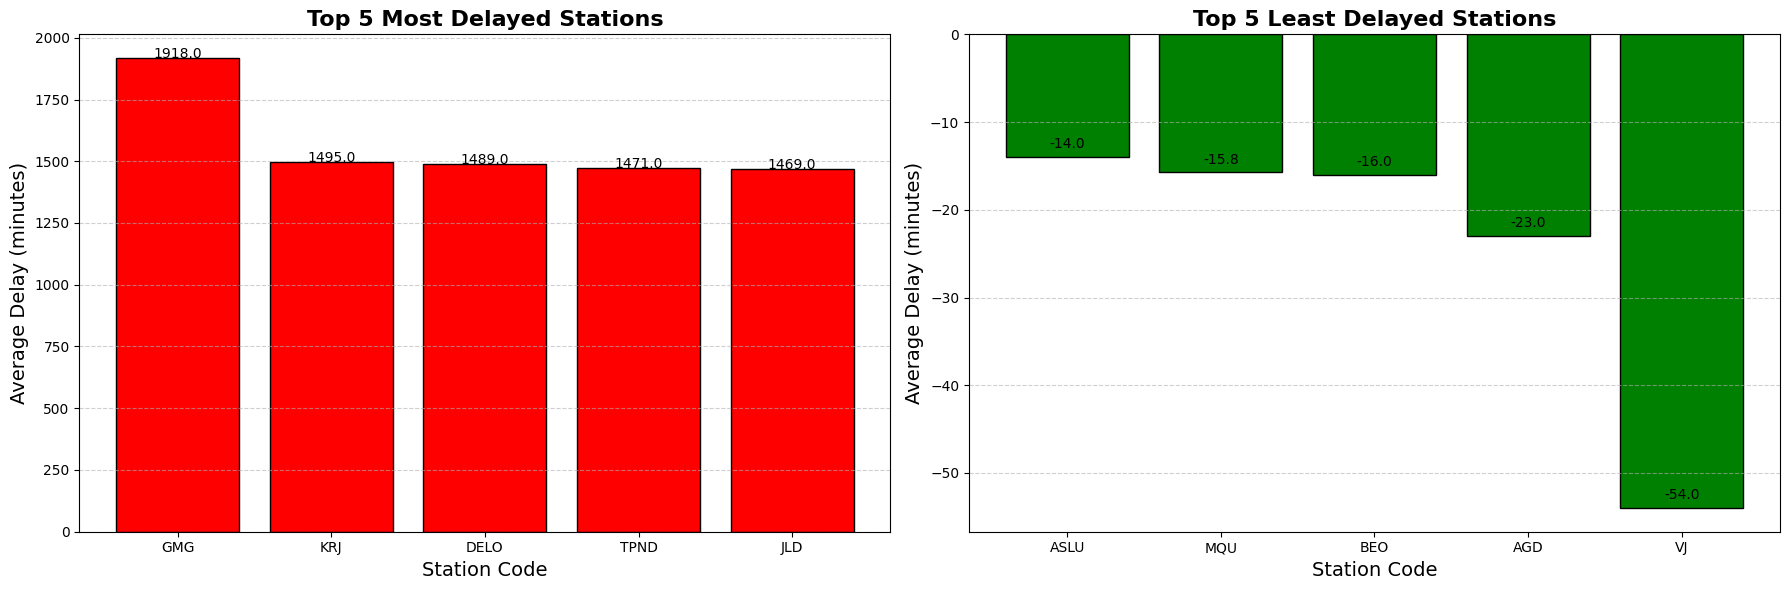

In [ ]:
def plot_station_delays(delay_dict):
    # Sort the dictionary
    sorted_delays = sorted(delay_dict.items(), key=lambda x: x[1], reverse=True)

    most_delayed = sorted_delays[:5]
    least_delayed = sorted_delays[-5:]

    # Unpack station codes and delays
    most_codes, most_values = zip(*most_delayed)
    least_codes, least_values = zip(*least_delayed)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(18,6))

    # Plot most delayed
    axes[0].bar(most_codes, most_values, color='red', edgecolor='black')
    axes[0].set_title('Top 5 Most Delayed Stations', fontsize=16, fontweight='bold')
    axes[0].set_xlabel('Station Code', fontsize=14)
    axes[0].set_ylabel('Average Delay (minutes)', fontsize=14)
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)
    for i, v in enumerate(most_values):
        axes[0].text(i, v+1, f"{v:.1f}", ha='center', fontsize=10)

    # Plot least delayed
    axes[1].bar(least_codes, least_values, color='green', edgecolor='black')
    axes[1].set_title('Top 5 Least Delayed Stations', fontsize=16, fontweight='bold')
    axes[1].set_xlabel('Station Code', fontsize=14)
    axes[1].set_ylabel('Average Delay (minutes)', fontsize=14)
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)
    for i, v in enumerate(least_values):
        axes[1].text(i, v+1, f"{v:.1f}", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

plot_station_delays(stations)

In [ ]:

months={}
counter={}

def get_month(date):
  split_date = date.split('-')
  return int(split_date[1])


for i in range(n_row):
  actual_arrival_date = data.iloc[i]["actal_arrival_date"]
  delay = data.iloc[i]["arrival_delay"]
  month = get_month(actual_arrival_date)
  if month in months:
    months[month]+=delay
    counter[month]+=1
  else:
    months[month]=delay
    counter[month]=1

for month in months:
  months[month]=months[month]/counter[month]

print(months)

{3: np.float64(28.434584933761855), 2: np.float64(36.888176719106696), 1: np.float64(44.94478769184613), 12: np.float64(33.247058823529414)}


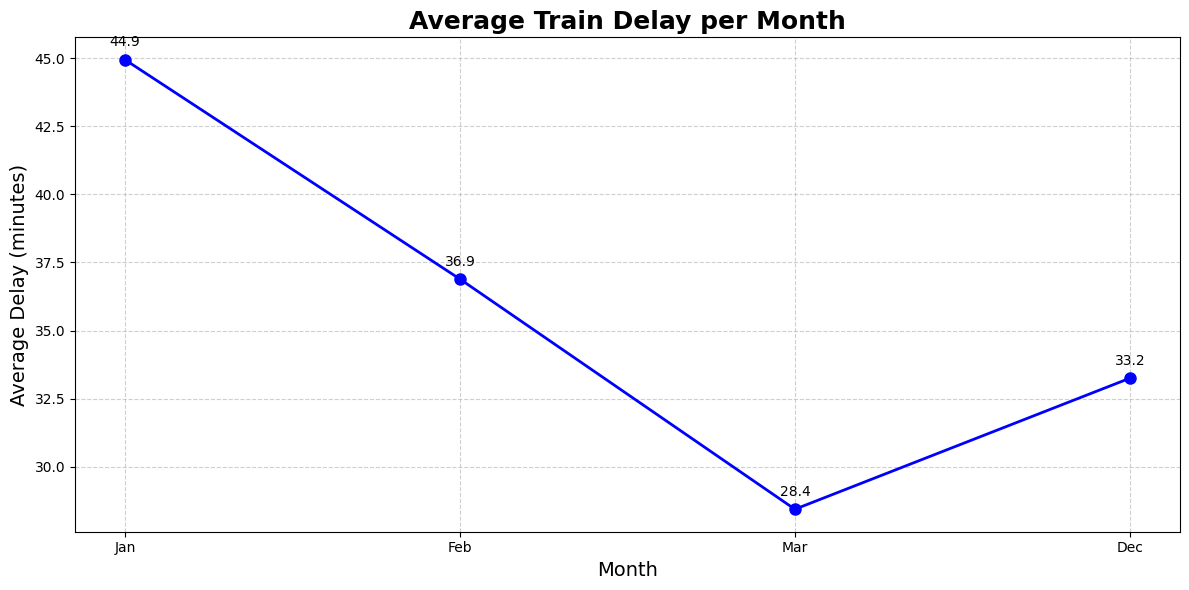

In [ ]:
def plot_monthly_delay(month_delay_dict):
    # Sort months in order (assuming keys are integers 1–12)
    sorted_months = sorted(month_delay_dict.keys())
    delays = [month_delay_dict[m] for m in sorted_months]

    # Month names for labeling
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot([month_names[m-1] for m in sorted_months], delays,
             marker='o', markersize=8, color='blue', linewidth=2)

    plt.title('Average Train Delay per Month', fontsize=18, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Average Delay (minutes)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Annotate points
    for i, delay in enumerate(delays):
        plt.text(i, delay+0.5, f"{delay:.1f}", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

plot_monthly_delay(months)

In [ ]:
months={}
counter={}

def get_month(date):
  split_date = date.split('-')
  return int(split_date[1])


for i in range(n_row):
  actual_arrival_date = data.iloc[i]["actal_arrival_date"]
  delay = data.iloc[i]["arrival_delay"]
  month = get_month(actual_arrival_date)
  if (delay<120):
    continue
  if month in months:
    months[month]+=delay
    counter[month]+=1
  else:
    months[month]=delay
    counter[month]=1

for month in months:
  months[month]=months[month]/counter[month]

print(months)

{3: np.float64(234.33618620185786), 1: np.float64(289.9935496577872), 2: np.float64(282.01886522795485), 12: np.float64(280.7428361498898)}


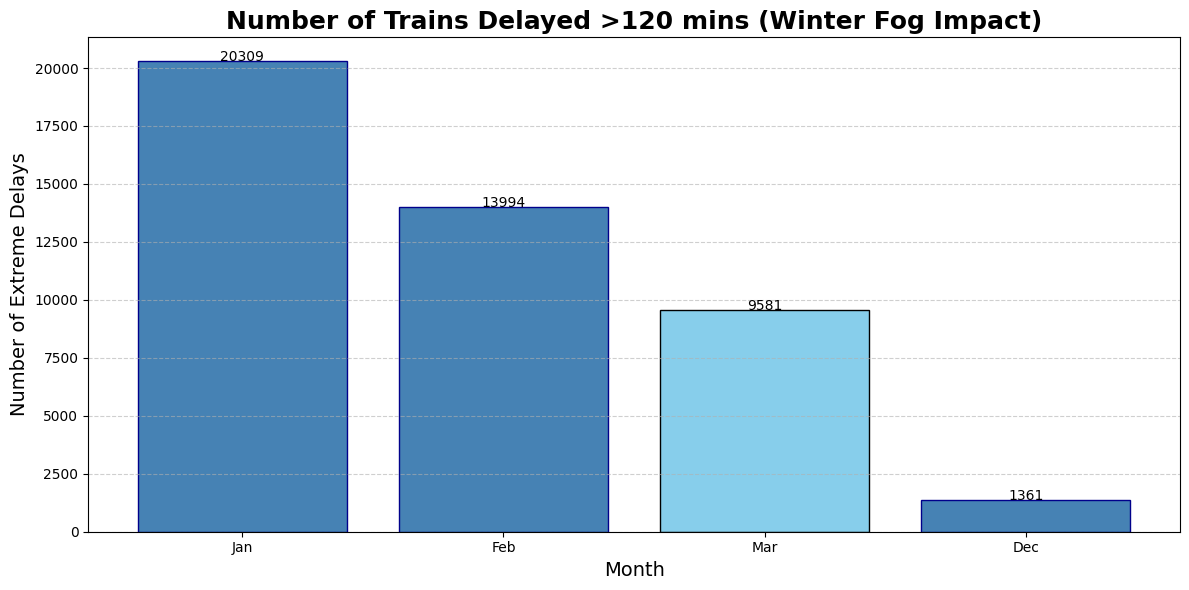

In [ ]:
def plot_extreme_delays(extreme_delay_dict):
    sorted_months = sorted(extreme_delay_dict.keys())
    extreme_counts = [extreme_delay_dict[m] for m in sorted_months]

    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    plt.figure(figsize=(12,6))
    bars = plt.bar(
        [month_names[m-1] for m in sorted_months],
        extreme_counts,
        color='skyblue',
        edgecolor='black'
    )

    plt.title('Number of Trains Delayed >120 mins (Winter Fog Impact)', fontsize=18, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Extreme Delays', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.6)


    for idx, bar in enumerate(bars):
        if sorted_months[idx] in [12, 1, 2]:
            bar.set_color('steelblue')
            bar.set_edgecolor('darkblue')


    for i, count in enumerate(extreme_counts):
        plt.text(i, count + 2, f"{count}", ha='center', fontsize=10)


    plt.tight_layout()
    plt.show()

plot_extreme_delays(counter)

In [ ]:
days={}
counter={}

for i in range(n_row):
  week_day = data.iloc[i]["week_day"]
  delay = data.iloc[i]["arrival_delay"]
  if week_day in days:
    days[week_day]+=delay
    counter[week_day]+=1
  else:
    days[week_day]=delay
    counter[week_day]=1

for day in days:
  days[day]=days[day]/counter[day]

print(days)

{'3': np.float64(36.81162273814413), '4': np.float64(35.029606068020556), '6': np.float64(37.351643612963144), '0': np.float64(39.47826039207072), '1': np.float64(36.605378649276595), '5': np.float64(38.08517627199836), '2': np.float64(36.02238257889276)}


{'3': np.float64(36.81162273814413), '4': np.float64(35.029606068020556), '6': np.float64(37.351643612963144), '0': np.float64(39.47826039207072), '1': np.float64(36.605378649276595), '5': np.float64(38.08517627199836), '2': np.float64(36.02238257889276)}


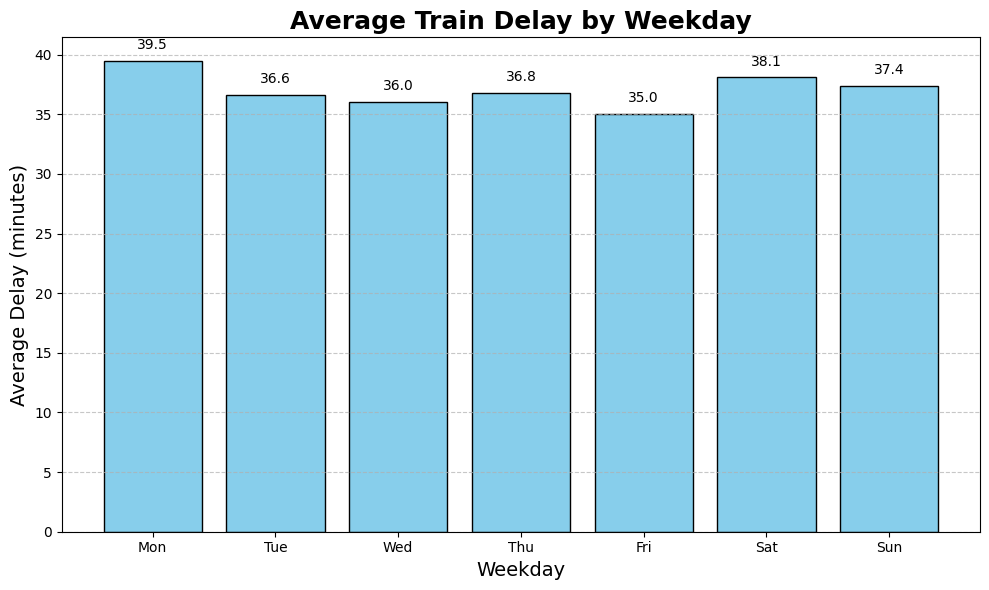

In [ ]:
import matplotlib.pyplot as plt

def plot_weekday_delay(weekday_delay_dict):
    # Updated mapping
    weekday_delay_dict = {int(k): v for k, v in weekday_delay_dict.items()}
    weekday_labels = {
        0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu',
        4: 'Fri', 5: 'Sat', 6: 'Sun'
    }

    # Sort by weekday order
    sorted_days = sorted(weekday_delay_dict.keys())
    delays = [weekday_delay_dict[d] for d in sorted_days]
    day_names = [weekday_labels[d] for d in sorted_days]

    # Plot
    plt.figure(figsize=(10,6))
    bars = plt.bar(day_names, delays, color='skyblue', edgecolor='black')

    plt.title('Average Train Delay by Weekday', fontsize=18, fontweight='bold')
    plt.xlabel('Weekday', fontsize=14)
    plt.ylabel('Average Delay (minutes)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars
    for i, delay in enumerate(delays):
        plt.text(i, delay + 1, f"{delay:.1f}", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()
print(days)
plot_weekday_delay(days)


In [ ]:
data.head()

,StationNo,train_no,station_code,actual_arrival_time,actal_arrival_date,actual_departure_time,actual_departure_date,distance,week_day,arrival_delay,departure_delay
0,0.0,09415,BDTS,1165,2025-03-20,1165,2025-03-20,0.000000,3,0.0,0.0
1,1.0,09415,BVI,1276,2025-03-20,1282,2025-03-20,18.352945,3,78.0,82.0
2,2.0,09415,VAPI,1437,2025-03-20,3,2025-03-21,156.647925,3,122.0,126.0
3,3.0,09415,UDN,140,2025-03-21,153,2025-03-21,247.801434,4,188.0,196.0
4,4.0,09415,BRC,269,2025-03-21,285,2025-03-21,381.214008,4,194.0,205.0


In [ ]:
from collections import defaultdict
delay_growth = defaultdict(list)

for (train_no, journey_date), group in data.groupby(['train_no', 'actal_arrival_date']):
    group = group.reset_index(drop=True)
    stations = group['station_code'].values
    delays = group['arrival_delay'].values
    for i in range(1, len(stations)):
        from_station = stations[i-1]
        to_station = stations[i]
        delta_delay = delays[i] - delays[i-1]
        delay_growth[(from_station, to_station)].append(delta_delay)
avg_delay_growth = {k: sum(v)/len(v) for k, v in delay_growth.items()}
for k, v in avg_delay_growth.items():
    print(f"{k[0]} -> {k[1]}: Avg delta delay = {v:.2f} min")


BDTS -> BVI: Avg delta delay = 4.22 min
BVI -> VAPI: Avg delta delay = 3.01 min
VAPI -> ST: Avg delta delay = -6.52 min
BRC -> ADI: Avg delta delay = -11.34 min
ADI -> VG: Avg delta delay = 14.57 min
VG -> DHG: Avg delta delay = -1.33 min
DHG -> SIOB: Avg delta delay = -19.39 min
SIOB -> BCOB: Avg delta delay = 2.54 min
BCOB -> GIMB: Avg delta delay = -5.96 min
ST -> BRC: Avg delta delay = 3.42 min
VAPI -> UDN: Avg delta delay = 2.13 min
UDN -> BRC: Avg delta delay = -3.69 min
GIMB -> BCOB: Avg delta delay = 8.54 min
BCOB -> SIOB: Avg delta delay = -2.43 min
SIOB -> DHG: Avg delta delay = 1.41 min
DHG -> VG: Avg delta delay = -13.46 min
VG -> ADI: Avg delta delay = 5.94 min
ADI -> BRC: Avg delta delay = 5.26 min
BRC -> ST: Avg delta delay = 3.58 min
ST -> VAPI: Avg delta delay = 9.98 min
VAPI -> BVI: Avg delta delay = 1.01 min
BVI -> BDTS: Avg delta delay = -31.37 min
AII -> KSG: Avg delta delay = 5.68 min
KSG -> JP: Avg delta delay = -2.88 min
JP -> SWM: Avg delta delay = 4.46 min
SWM

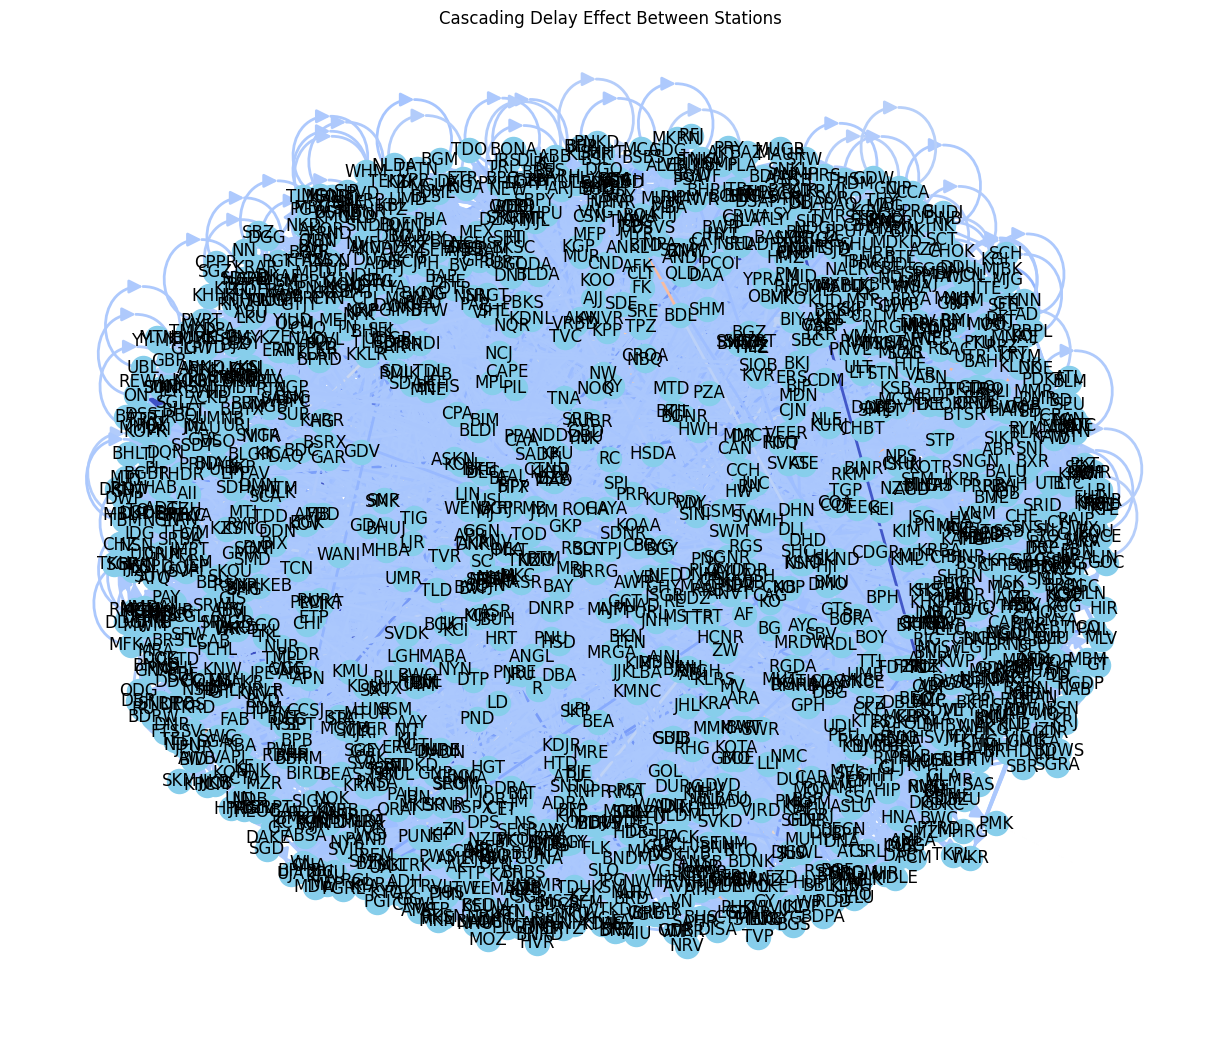

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add edges with average delay growth as weight
for (from_station, to_station), avg_delta in avg_delay_growth.items():
    G.add_edge(from_station, to_station, weight=avg_delta)

# Draw
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
edge_weights = [e[2]['weight'] for e in edges]

nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_weights, edge_cmap=plt.cm.coolwarm, width=2, arrowsize=20)
plt.title("Cascading Delay Effect Between Stations")
plt.show()

In [ ]:
delays = []
ptr=0;
all_runs=[]
while (ptr<n_row):
  curr_train_run = []
  ptr2=ptr;
  curr_train_no=data.iloc[ptr]["train_no"]
  while (ptr2<n_row and data.iloc[ptr2]["train_no"]==curr_train_no):
    curr_date_run = []
    row = data.iloc[ptr2]
    curr_date_run.append(row[["station_code","distance","week_day","actal_arrival_date","train_no","arrival_delay"]])
    ptr2+=1
    while (ptr2<n_row and data.iloc[ptr2]["StationNo"]!=0):
      row = data.iloc[ptr2]
      curr_date_run.append(row[["station_code","distance","week_day","actal_arrival_date","train_no","arrival_delay"]])
      ptr2+=1
    curr_train_run.append(curr_date_run)
  ptr=ptr2
  all_runs.append(curr_train_run)

In [ ]:
print(all_runs)

Buffered data was truncated after reaching the output size limit.